# Function projection in a MW basis

There are two equivalent representations of a function using multiwavets: the *compressed* representation and the *reconstructed* representation. The fisrt one employs the scaling functions at the coarsest scale $N_0$ (defined by the domain of the problem) and the wavelet functions at all successive scales $n = N_0, \ldots N_{max}$. The second one employs the scaling functions at scale $N_{max}+1$

Compressed representation:

$$f(x) \simeq \sum_i s^{N_0}_i \phi^0_i(x) + \sum_{n=N_{min}}^{N_{max}} \sum_l \sum_i d^n_{il} \psi^n_{il}(x)$$

Reconstructed representation:

$$f(x) \simeq \sum_l \sum_i s^{N_{max}+1}_{il} \phi^n_{il}(x)$$

The scaling and wavelet coefficients are formally obtained by projection:

$$s^n_{il} = \left\langle f(x)|\phi^n_{il}(x) \right\rangle$$
$$d^n_{il} = \left\langle f(x)|\psi^n_{il}(x) \right\rangle$$

Some practical considerations:
- The scaling coefficients $s$ are obtained by a simple quadrature scheme, often using the natural quadrature points ($x_\mu$) and weights ($\omega_\mu$) of the chosen polynomial basis
  * $s^n_{il} \approx \sum_\mu w_\mu \phi^n_{il}(x) f(x_\mu)$
  * If computed in this manner, the coefficients will only be accurate if the function $f(x)$ is sufficiently smooth in that box.  Indeed, if the function $f(x)$ has fine-scale structure that falls between the numerical quadrature points, the computed values can be completely wrong.
  * Thus, adaptive refinement needs to be performed carefully and with the awareness that computationally viable approaches are just heuristics that can sometimes fail.
- The wavelet coefficients $d$ are obtained by computing the scaling coeffients at the next finest scale and then employing the two-scale relationship.  Doing this recursively up the tree performs the wavelet transform.
- The compressed representation shows how the scaling coefficients are used only at the coarsest scale whereas the wavelet coefficients are used at all subsequent scales
- The sum over the translation indices $l$ includes all nodes present at the given scale. In an *adaptive* representation the tree structure is locally terminated based on precision requirements
- The reconstructed representation (here shown for a *uniform* grid) is performed at scale $N_{max}+1$. 
- The compressed and reconstructed representations have the same number of coefficients.



In this exercise you will:
- project a function of your choice using a fixed and an adaptive projection
- inspect the tree structures obtained with each projection. What is the difference in the number of nodes?
- check the precision achieved with the different projections. Which one is most precise?

Part 1: set up

After importing the relevant packages (essentially the 1d routines of `VAMPyR`, `numpy` and `matplotlib` you need to create an MRA object, specifying the working interval and the order of the polynomial.

Thereafter you will create two projectors: a precision-based one and a uniform scale one.

Then you can define a function of choice which you will be using to experiment with precision.

Finally you will use the projectors to obtain the corresponding tree structures.

In [1]:
#importing relevant packages
from vampyr import vampyr1d as vp1
import matplotlib.pyplot as plt
import numpy as np

#defining MRA and projectors
x_min = -20
x_max = +20
order = 7
precision = 1e-5
uniform_scale = 2
mra = vp1.MultiResolutionAnalysis(box=[x_min, x_max], order=order)
P_eps = vp1.ScalingProjector(mra, prec = precision)
P_fix = vp1.ScalingProjector(mra, scale = uniform_scale)

def f(x):
    return np.exp(-x[0]**2) * np.sin(x[0])


Part 2: projection of the tree structures

Project the function using the two projectors created above and
inspect the tree structures with `print`. Which one has more nodes? Which one goes deeper down in refinement (larger scale)? Do the norms agree with each other?

Extra: if you use the `f_fix.crop(prec)` function before printing the tree structures, what happens to it?

In [2]:
f_fix = P_fix(f)
f_eps = P_eps(f)

print(f_eps)
print(f_fix)


*FunctionTree: nn
  genNodes: 0
  square norm: 0.24657
  root scale: -4
  order: 7
  nodes: 22
  endNodes: 12
  nodes per scale: 
    scale=-4  nodes=2
    scale=-3  nodes=4
    scale=-2  nodes=4
    scale=-1  nodes=4
    scale=0  nodes=4
    scale=1  nodes=4


*FunctionTree: nn
  genNodes: 0
  square norm: 0.24657
  root scale: -4
  order: 7
  nodes: 254
  endNodes: 128
  nodes per scale: 
    scale=-4  nodes=2
    scale=-3  nodes=4
    scale=-2  nodes=8
    scale=-1  nodes=16
    scale=0  nodes=32
    scale=1  nodes=64
    scale=2  nodes=128



Part 3: Plotting and precision check

You can now plot the analytical function, the two projected ones and the error obtained with them. 

- How precise are the representation? 
- Which one is the most precise? 
- Is the precision requested in the adaptive projection achieved? 
- Can you adjust the projectors above to increase the precision? 

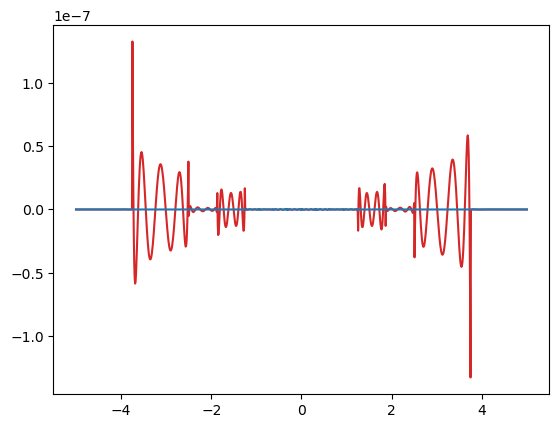

In [3]:
x_vec = np.linspace(-5, 5, 1000)
f_plt     = np.array([f([x]) for x in x_vec ])
f_fix_plt = np.array([f_fix([x]) for x in x_vec ])
f_eps_plt = np.array([f_eps([x]) for x in x_vec ])
diff_fix = f_fix_plt - f_plt
diff_eps = f_eps_plt - f_plt
plt.plot(x_vec, diff_eps, "tab:red") # your projected function
plt.plot(x_vec, diff_fix, "tab:blue") # your function
plt.show()